In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import e
import random
from collections import Counter

# Monte Carlo Simulation
> $f(x) = arcsch(x) + \frac{1}{2}\sin^2x + \frac{1}{x^2}$

> $arcsch(x) = \ln(\frac{1}{x} + \sqrt{{1 \over x^2} + 1})$

- $arcsch(x)$

<img src="./Graph.PNG" width="400" height="400">

- **$f(x) = arcsch(x) + \frac{1}{2}\sin^2x + \frac{1}{x^2}$**

<img src="./Graph2.PNG" width="400" height="400">

- 위 그래프에서 아래 구간의 함수의 면적을 구한다.
  - x : (0, 4)
  - y : (0, 4)

### x와 y가 0~4인 난수 100,000개 생성

In [159]:
df = pd.DataFrame(np.random.rand(100000, 2)*4, columns=['X', 'y'])
df

,X,y
0,1.624989,1.669159
1,1.736446,0.116044
2,1.400634,1.595280
3,3.742808,2.008224
4,1.811109,3.821736
...,...,...
99995,0.342088,0.800305
99996,3.158384,2.519003
99997,0.657114,1.539899
99998,3.469179,3.534166


### 함수 구현 - f(x)

In [160]:
def function_yd(x):
  arcsch = np.log(1/x + (1/x**2 + 1)**0.5)
  half_sin_squared = 0.5 * (math.sin(x)**2)
  frac = 1/x**2
  return arcsch + half_sin_squared + frac

In [161]:
df['fx'] = df['X'].map(function_yd)
df

,X,y,fx
0,1.624989,1.669159,1.459212
1,1.736446,0.116044,1.366093
2,1.400634,1.595280,1.659472
3,3.742808,2.008224,0.495460
4,1.811109,3.821736,1.303905
...,...,...,...
99995,0.342088,0.800305,10.395398
99996,3.158384,2.519003,0.411941
99997,0.657114,1.539899,3.709255
99998,3.469179,3.534166,0.419257


### 난수 y가 f(x)보다 작거나 같으면 skyblue, 크면 pink를 리턴하는 함수
- (f(x) - y) 값이 양수면 skyblue, 음수면 pink를 리턴하는 방식

In [162]:
def color(value):
  if (value >= 0):
    return 'skyblue'
  else:
    return 'pink'

In [163]:
df['color'] = df['fx'] - df['y']
df['color'] = df['color'].map(color)
df

,X,y,fx,color
0,1.624989,1.669159,1.459212,pink
1,1.736446,0.116044,1.366093,skyblue
2,1.400634,1.595280,1.659472,skyblue
3,3.742808,2.008224,0.495460,pink
4,1.811109,3.821736,1.303905,pink
...,...,...,...,...
99995,0.342088,0.800305,10.395398,skyblue
99996,3.158384,2.519003,0.411941,pink
99997,0.657114,1.539899,3.709255,skyblue
99998,3.469179,3.534166,0.419257,pink


### 함수보다 큰 점(pink)의 수와 작은 점(skyblue)의 갯수

In [164]:
print('함수보다 큰 점(pink) : ' + str(Counter(df['color'])['pink']))
print('함수보다 작은 점(skyblue) : ' + str(Counter(df['color'])['skyblue']))

함수보다 큰 점(pink) : 59916
함수보다 작은 점(skyblue) : 40084


### 시각화

(0.0, 4.0)

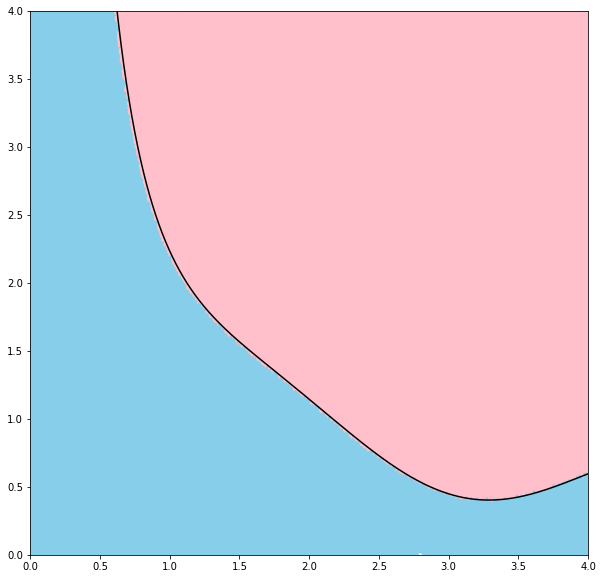

In [167]:
# 시각화를 위해 정렬
df = df.sort_values(by = ['X'])

plt.figure(figsize=(10, 10))

plt.plot(df['X'], df['fx'], color = 'black')
plt.scatter(df['X'], df['y'], c = df['color'])

plt.xlim(0, 4)
plt.ylim(0, 4)